In [1]:
#bibliotecas necessárias
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.util import ngrams
from nltk.collocations import *

In [2]:
#importar os arquivos do diretório do meu computador
df = pd.read_csv('linkedin_table.csv')

In [3]:
#Verificar o arquivo
df.head()

,link,empresas,cargos,categorias,locais,descricoes
0,https://br.linkedin.com/jobs/view/cientista-de...,Neogrid,Cientista de Dados Júnior,"['Assistente', 'Tempo integral', 'Engenharia e...","Agudos, SP",Nós da Neogrid estamos em busca de pessoas que...
1,https://br.linkedin.com/jobs/view/analista-de-...,Riachuelo,Analista de Dados Júnior,"['Não aplicável', 'Tempo integral', 'Tecnologi...",Brasil,Aqui na Riachuelo a gente se conecta com @vc! ...
2,https://br.linkedin.com/jobs/view/analista-de-...,ProjecTI,Analista de Dados Júnior,['Contrato'],"São Paulo, SP","Por favor, ler com atenção a descrição.\n\nVag..."
3,https://br.linkedin.com/jobs/view/analista-de-...,Grupo Junco - Industria e Comercio,Analista de dados,['Tempo integral'],"Uberlândia, MG","Buscamos candidato com perfil analítico, boa c..."
4,https://br.linkedin.com/jobs/view/cientista-de...,EY,Cientista de Dados Júnior 1,"['Assistente', 'Tempo integral', 'Engenharia e...","Porto Alegre, RS","Na EY, você terá a chance de construir uma car..."


In [4]:
df.shape

(812, 6)

In [5]:
df.dtypes

link          object
empresas      object
cargos        object
categorias    object
locais        object
descricoes    object
dtype: object

In [6]:
#mudar as colunas de object para string, além de ja retirar os acentos e colocar em letra minuscula.
for col in df.columns:
    df[col] = df[col].apply(lambda x: unidecode(x))
    df[col] = df[col].astype('string').str.lower()   


In [7]:
df.dtypes

link          string
empresas      string
cargos        string
categorias    string
locais        string
descricoes    string
dtype: object

In [8]:
#eliminar duplicatas
df.drop_duplicates(subset=['empresas', 'cargos'])
df.shape

(812, 6)

In [9]:
#criar coluna auxiliar que será usada como filtro
df['subdivisao'] = df['cargos']

In [10]:
df.head()

,link,empresas,cargos,categorias,locais,descricoes,subdivisao
0,https://br.linkedin.com/jobs/view/cientista-de...,neogrid,cientista de dados junior,"['assistente', 'tempo integral', 'engenharia e...","agudos, sp",nos da neogrid estamos em busca de pessoas que...,cientista de dados junior
1,https://br.linkedin.com/jobs/view/analista-de-...,riachuelo,analista de dados junior,"['nao aplicavel', 'tempo integral', 'tecnologi...",brasil,aqui na riachuelo a gente se conecta com @vc! ...,analista de dados junior
2,https://br.linkedin.com/jobs/view/analista-de-...,projecti,analista de dados junior,['contrato'],"sao paulo, sp","por favor, ler com atencao a descricao. vaga:...",analista de dados junior
3,https://br.linkedin.com/jobs/view/analista-de-...,grupo junco - industria e comercio,analista de dados,['tempo integral'],"uberlandia, mg","buscamos candidato com perfil analitico, boa c...",analista de dados
4,https://br.linkedin.com/jobs/view/cientista-de...,ey,cientista de dados junior 1,"['assistente', 'tempo integral', 'engenharia e...","porto alegre, rs","na ey, voce tera a chance de construir uma car...",cientista de dados junior 1


In [11]:
#regex dos padrões das palavras chaves.
regex_cientista = r'.*?ci[êe]n.*?'
regex_analista = r'.*?an[aá]l[yi].*?'
regex_engenheiro = r'.*?engenh.*?'
regex_bi = r'.*?intel.*?'
regex_estagiario = r'.*?est[aá]g.*?'

In [12]:
#padronização das subdivisões
df.loc[df['subdivisao'].str.contains(regex_cientista, regex = True), 'subdivisao'] = 'cientista'

In [13]:
df.loc[df['subdivisao'].str.contains(regex_analista, regex = True), 'subdivisao'] = 'analista'

In [14]:
df.loc[df['subdivisao'].str.contains(regex_engenheiro, regex = True), 'subdivisao'] = 'engenheiro'

In [15]:
df.head()

,link,empresas,cargos,categorias,locais,descricoes,subdivisao
0,https://br.linkedin.com/jobs/view/cientista-de...,neogrid,cientista de dados junior,"['assistente', 'tempo integral', 'engenharia e...","agudos, sp",nos da neogrid estamos em busca de pessoas que...,cientista
1,https://br.linkedin.com/jobs/view/analista-de-...,riachuelo,analista de dados junior,"['nao aplicavel', 'tempo integral', 'tecnologi...",brasil,aqui na riachuelo a gente se conecta com @vc! ...,analista
2,https://br.linkedin.com/jobs/view/analista-de-...,projecti,analista de dados junior,['contrato'],"sao paulo, sp","por favor, ler com atencao a descricao. vaga:...",analista
3,https://br.linkedin.com/jobs/view/analista-de-...,grupo junco - industria e comercio,analista de dados,['tempo integral'],"uberlandia, mg","buscamos candidato com perfil analitico, boa c...",analista
4,https://br.linkedin.com/jobs/view/cientista-de...,ey,cientista de dados junior 1,"['assistente', 'tempo integral', 'engenharia e...","porto alegre, rs","na ey, voce tera a chance de construir uma car...",cientista


In [16]:
df['subdivisao'].value_counts()

analista                                             445
cientista                                            210
engenheiro                                            37
estagiario de dados                                   13
banco de dados - estagio - brotas/sp                   8
banco de talentos- time tecnologia- dados              8
estagiario em dados                                    7
estagio em dados inteligencia de mercado               6
assistente de dados                                    5
banco de dados jovem aprendiz - dracena/sp             5
estagio em dados                                       5
intern - banco de dados                                5
pessoa coordenadora de dados (prevencao a fraude)      5
estagio em controladoria                               5
administrador(a) de dados | remoto                     4
assistente financeiro                                  4
administrador de dados                                 4
especialista de tecnologia (bi)

Criar outra categoria para vermos se é Jr, pleno ou Senhor, concatenando categorias e cargos e depois usando regex!

In [17]:
#Concatenar o nome do cargo com o campo contendo a categoria da empresa,
#ambos podem conter a experiência requerida
df['experiencia'] = df['cargos'] + df['categorias']

In [18]:
df.head()

,link,empresas,cargos,categorias,locais,descricoes,subdivisao,experiencia
0,https://br.linkedin.com/jobs/view/cientista-de...,neogrid,cientista de dados junior,"['assistente', 'tempo integral', 'engenharia e...","agudos, sp",nos da neogrid estamos em busca de pessoas que...,cientista,"cientista de dados junior['assistente', 'tempo..."
1,https://br.linkedin.com/jobs/view/analista-de-...,riachuelo,analista de dados junior,"['nao aplicavel', 'tempo integral', 'tecnologi...",brasil,aqui na riachuelo a gente se conecta com @vc! ...,analista,"analista de dados junior['nao aplicavel', 'tem..."
2,https://br.linkedin.com/jobs/view/analista-de-...,projecti,analista de dados junior,['contrato'],"sao paulo, sp","por favor, ler com atencao a descricao. vaga:...",analista,analista de dados junior['contrato']
3,https://br.linkedin.com/jobs/view/analista-de-...,grupo junco - industria e comercio,analista de dados,['tempo integral'],"uberlandia, mg","buscamos candidato com perfil analitico, boa c...",analista,analista de dados['tempo integral']
4,https://br.linkedin.com/jobs/view/cientista-de...,ey,cientista de dados junior 1,"['assistente', 'tempo integral', 'engenharia e...","porto alegre, rs","na ey, voce tera a chance de construir uma car...",cientista,"cientista de dados junior 1['assistente', 'tem..."


In [19]:
#regex procurando palavras chave
regex_estagio = r'.*?est[áa]g.*?'
regex_assistente = r'.*?assistente.*?'
regex_junior = r'.*?j[uú]nior.*?'
regex_pleno =r'.*?pleno.*?'
regex_senior =r'.*?s[eê]nior.*?'

In [20]:
df.loc[df['experiencia'].str.contains(regex_estagio, regex = True), 'experiencia'] = 'estagiario'

In [21]:
df.loc[df['experiencia'].str.contains(regex_junior, regex = True), 'experiencia'] = 'junior'
df.loc[df['experiencia'].str.contains(r'[Jj]r', regex = True), 'experiencia'] = 'junior'

In [22]:
df.loc[df['experiencia'].str.contains(regex_pleno, regex = True), 'experiencia'] = 'pleno'


In [23]:
df.loc[df['experiencia'].str.contains(regex_senior, regex = True), 'experiencia'] = 'senior'


In [24]:
df.loc[df['experiencia'].str.contains(regex_assistente, regex = True), 'experiencia'] = 'assistente'


In [25]:
df.head()

,link,empresas,cargos,categorias,locais,descricoes,subdivisao,experiencia
0,https://br.linkedin.com/jobs/view/cientista-de...,neogrid,cientista de dados junior,"['assistente', 'tempo integral', 'engenharia e...","agudos, sp",nos da neogrid estamos em busca de pessoas que...,cientista,junior
1,https://br.linkedin.com/jobs/view/analista-de-...,riachuelo,analista de dados junior,"['nao aplicavel', 'tempo integral', 'tecnologi...",brasil,aqui na riachuelo a gente se conecta com @vc! ...,analista,junior
2,https://br.linkedin.com/jobs/view/analista-de-...,projecti,analista de dados junior,['contrato'],"sao paulo, sp","por favor, ler com atencao a descricao. vaga:...",analista,junior
3,https://br.linkedin.com/jobs/view/analista-de-...,grupo junco - industria e comercio,analista de dados,['tempo integral'],"uberlandia, mg","buscamos candidato com perfil analitico, boa c...",analista,analista de dados['tempo integral']
4,https://br.linkedin.com/jobs/view/cientista-de...,ey,cientista de dados junior 1,"['assistente', 'tempo integral', 'engenharia e...","porto alegre, rs","na ey, voce tera a chance de construir uma car...",cientista,junior


In [26]:
df['experiencia'].value_counts()

junior                                               252
pleno                                                164
assistente                                           137
estagiario                                           121
analista de dados['tempo integral']                   13
banco de talentos- time tecnologia- dados['nao...      8
cientista de de dados - analytics['nao aplicav...      8
analista de dados - data viz['tempo integral']         7
senior                                                 7
cientista de dados['tempo integral']                   7
pessoa coordenadora ciencia de dados['nao apli...      6
especialista planejamento operacional (analise...      5
cientista de dados | banco de talentos['nao ap...      5
analista em risco de credito['nao aplicavel', ...      5
data scientist['executivo', 'tempo integral', ...      5
cientista de dados - fintech magalu['nao aplic...      5
pessoa engenheira de dados['nao aplicavel', 't...      5
analista de dados['nao aplicave

## NLP

### Tratamento

In [27]:
# remoção da pontuação
df['descricoes_tratada'] = df['descricoes'].str.replace('[{}]'.format(string.punctuation), '')

C:\Users\mateu\AppData\Local\Temp\ipykernel_1720\2787270519.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['descricoes_tratada'] = df['descricoes'].str.replace('[{}]'.format(string.punctuation), '')


In [28]:
stop_words = stopwords.words('portuguese')

In [29]:
# remoção das stopo_words de parada
df['descricoes_tratada'] = df['descricoes_tratada'].apply(lambda x: ' '.join([w for w in x.split() if w not in (stop_words)]))

In [30]:
#como tem muitas palavras que não agregam nada, separei as que estou mais interessado. 
ferramentas = ['python', 'r', 'power', 'bi', 'sql', 'spark', 'excel', 'pandas', 'numpy', 'sklearn', 'tableau', 'nosql',
               'dashboard', 'vba', 'google', 'analytics', 'data' 'studio', 'sheets', 'machine', 'learning', 'inglês',
               'espanhol', 'diversidade', 'hadoop', 'sas', 'matlab', 'julia', 'pytorch', 'scikit', 'tensorflow', 'aws']

# Análise Total

In [31]:
texto_total = ' '.join(df['descricoes_tratada'])
tokens_total = word_tokenize(texto_total)
unigram_total = nltk.FreqDist(tokens_total)
total_ordenado = sorted(unigram_total.items(), key=lambda x: x[1], reverse=True)
unigram_total = pd.DataFrame.from_dict(total_ordenado)
unigram_total = unigram_total.rename({0: 'Palavras', 1:'Frequencia'}, axis = 1)
unigram_total.head(30)

,Palavras,Frequencia
0,dados,2941
1,voce,1551
2,pessoas,1441
3,experiencia,1172
4,conhecimento,1168
5,desenvolvimento,828
6,time,821
7,empresa,808
8,dia,772
9,fazer,767


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'dados'),
  Text(1, 0, 'voce'),
  Text(2, 0, 'pessoas'),
  Text(3, 0, 'experiencia'),
  Text(4, 0, 'conhecimento'),
  Text(5, 0, 'desenvolvimento'),
  Text(6, 0, 'time'),
  Text(7, 0, 'empresa'),
  Text(8, 0, 'dia'),
  Text(9, 0, 'fazer'),
  Text(10, 0, 'nao'),
  Text(11, 0, 'trabalho'),
  Text(12, 0, 'clientes'),
  Text(13, 0, 'todos'),
  Text(14, 0, 'melhor'),
  Text(15, 0, 'vida'),
  Text(16, 0, 'sao'),
  Text(17, 0, 'solucoes'),
  Text(18, 0, 'area'),
  Text(19, 0, 'negocio')])

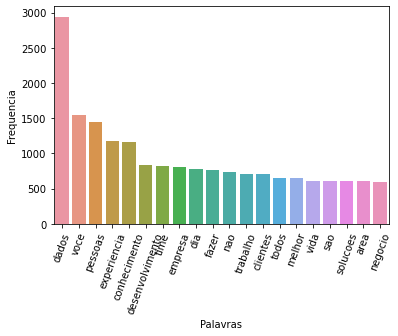

In [32]:
sns.barplot(data = unigram_total.head(20),
           x = 'Palavras',
           y = 'Frequencia')
plt.xticks(rotation = 70)

In [33]:
ferramentas_df_total = unigram_total[unigram_total['Palavras'].isin(ferramentas)]
ferramentas_df_total.head(20)

,Palavras,Frequencia
25,sql,534
33,diversidade,466
42,power,425
48,bi,411
50,python,407
81,excel,308
98,analytics,271
100,r,271
116,learning,244
155,machine,205


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'sql'),
  Text(1, 0, 'diversidade'),
  Text(2, 0, 'power'),
  Text(3, 0, 'bi'),
  Text(4, 0, 'python'),
  Text(5, 0, 'excel'),
  Text(6, 0, 'analytics'),
  Text(7, 0, 'r'),
  Text(8, 0, 'learning'),
  Text(9, 0, 'machine'),
  Text(10, 0, 'google'),
  Text(11, 0, 'tableau'),
  Text(12, 0, 'vba'),
  Text(13, 0, 'aws'),
  Text(14, 0, 'sas'),
  Text(15, 0, 'spark'),
  Text(16, 0, 'espanhol'),
  Text(17, 0, 'hadoop'),
  Text(18, 0, 'sheets'),
  Text(19, 0, 'pandas'),
  Text(20, 0, 'nosql'),
  Text(21, 0, 'numpy'),
  Text(22, 0, 'datastudio'),
  Text(23, 0, 'sklearn'),
  Text(24, 0, 'julia'),
  Text(25, 0, 'matlab')])

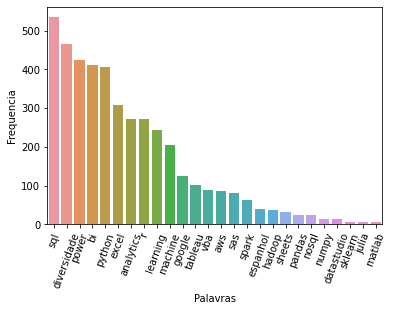

In [67]:
sns.barplot(data = ferramentas_df_total,
           x = 'Palavras',
           y = 'Frequencia')
plt.xticks(rotation = 70)

# Análise parcial

#### A partir da aqui a função automatizará 

In [35]:
#analise de uma combinação de experiência e cargo.
experiencia = 'junior'
cargo = 'analista'
#filtrar o dataframe
df_filtrado = df[(df['experiencia']==experiencia) & (df['subdivisao']==cargo)]
#número de vagas
vagas = len(df_filtrado)

### Tokenização

In [36]:
#concatenar todos as descrições das vagas to dataframe filtrado 
texto = ' '.join(df_filtrado['descricoes_tratada'])

#cada palavra vira 1 elemento da lista
tokens = word_tokenize(texto)

#### Unigrama

In [37]:
#Calcula a frequencia, ou seja, quantas vezes cada palavra apareceu, e armazena como dict
unigram = nltk.FreqDist(tokens)

In [38]:
#ordena o par palavra frequencia em ordem decrescente
ordenado = sorted(unigram.items(), key=lambda x: x[1], reverse=True)

In [39]:
#transforma o dict em dataframe
unigram_df = pd.DataFrame.from_dict(ordenado)

In [40]:
#renomeia as colunas
unigram_df = unigram_df.rename({0: 'Palavras', 1:'Frequencia'}, axis = 1)

In [41]:
unigram_df.head(30)

,Palavras,Frequencia
0,dados,720
1,voce,375
2,experiencia,323
3,pessoas,302
4,conhecimento,229
5,clientes,224
6,time,223
7,desenvolvimento,209
8,nao,197
9,area,197


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'dados'),
  Text(1, 0, 'voce'),
  Text(2, 0, 'experiencia'),
  Text(3, 0, 'pessoas'),
  Text(4, 0, 'conhecimento'),
  Text(5, 0, 'clientes'),
  Text(6, 0, 'time'),
  Text(7, 0, 'desenvolvimento'),
  Text(8, 0, 'nao'),
  Text(9, 0, 'area'),
  Text(10, 0, 'informacoes'),
  Text(11, 0, 'power'),
  Text(12, 0, 'todos'),
  Text(13, 0, 'dia'),
  Text(14, 0, 'sao'),
  Text(15, 0, 'fazer'),
  Text(16, 0, 'aqui'),
  Text(17, 0, 'vida'),
  Text(18, 0, 'trabalho'),
  Text(19, 0, 'vale')])

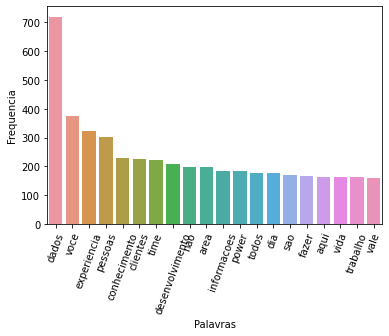

In [42]:
#cria um barplot das 20 palavras com maior frequencia
sns.barplot(data = unigram_df.head(20),
           x = 'Palavras',
           y = 'Frequencia')
plt.xticks(rotation = 70)

(-0.5, 399.5, 199.5, -0.5)

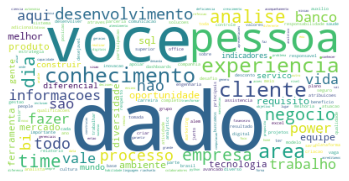

In [43]:
#cria wordcloud e tdoas as palvras do texto
wc_ferramentas = WordCloud(collocations = False,
                          background_color = 'white').generate(texto)
plt.imshow(wc_ferramentas)
plt.axis('off')

In [44]:
#filtrei o df dos unigram para ter apenas as ferramentas
ferramentas_df = unigram_df[unigram_df['Palavras'].isin(ferramentas)]

In [45]:
ferramentas_df.head()

,Palavras,Frequencia
11,power,184
20,bi,157
23,sql,149
31,diversidade,129
42,excel,110


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'power'),
  Text(1, 0, 'bi'),
  Text(2, 0, 'sql'),
  Text(3, 0, 'diversidade'),
  Text(4, 0, 'excel'),
  Text(5, 0, 'analytics'),
  Text(6, 0, 'python'),
  Text(7, 0, 'r'),
  Text(8, 0, 'vba'),
  Text(9, 0, 'tableau'),
  Text(10, 0, 'google'),
  Text(11, 0, 'sas'),
  Text(12, 0, 'spark'),
  Text(13, 0, 'sheets'),
  Text(14, 0, 'aws'),
  Text(15, 0, 'espanhol'),
  Text(16, 0, 'hadoop'),
  Text(17, 0, 'learning'),
  Text(18, 0, 'nosql'),
  Text(19, 0, 'machine')])

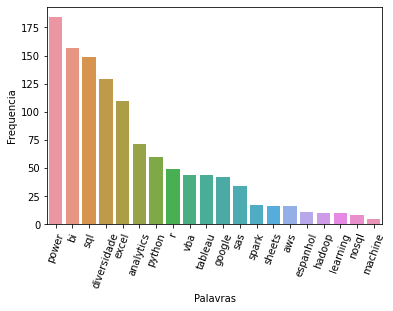

In [46]:
#bar plot com as frequencias de cada ferramenta
sns.barplot(data = ferramentas_df.head(20),
           x = 'Palavras',
           y = 'Frequencia')
plt.xticks(rotation = 70)

In [47]:
# para usar o word cloud o arquivo precisa ser string. 
# Voltei nos tokens e concatenei apenas os tokens das ferramentas.
freq_ferramentas = ','.join([w for w in tokens if w in ferramentas])

(-0.5, 399.5, 199.5, -0.5)

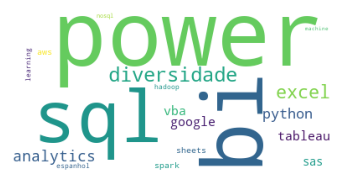

In [48]:
#wordcloud das ferramentas
wc_ferramentas = WordCloud(collocations = False,
                          background_color = 'white').generate(freq_ferramentas)
plt.imshow(wc_ferramentas)
plt.axis('off')

#### Bigrama

In [49]:
# em vez de criar uma lista com cada palavra, os elementos da lista serao duplas de palavras consecutivas
# alem disso, tambem cria um dicit com chave sendo a dupla de palavras e valor a frequencia.
bigrama = nltk.FreqDist(nltk.bigrams(word_tokenize(texto)))

In [50]:
#ordena o dict, da maior frequencia para menor. 
sorted_bgm = sorted(bigrama.items(), key = lambda x: x[1], reverse=True)

In [51]:
#cria um dataframe 
bigrama_df = pd.DataFrame.from_dict(sorted_bgm)

In [52]:
bigrama_df.head(15)

,0,1
0,"(power, bi)",136
1,"(seguro, vida)",86
2,"(informacoes, adicionais)",84
3,"(requisitos, qualificacoes)",80
4,"(banco, dados)",77
5,"(responsabilidades, atribuicoes)",75
6,"(dia, dia)",68
7,"(fazer, parte)",65
8,"(vale, refeicao)",57
9,"(ensino, superior)",53


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "('power', 'bi')"),
  Text(1, 0, "('seguro', 'vida')"),
  Text(2, 0, "('informacoes', 'adicionais')"),
  Text(3, 0, "('requisitos', 'qualificacoes')"),
  Text(4, 0, "('banco', 'dados')"),
  Text(5, 0, "('responsabilidades', 'atribuicoes')"),
  Text(6, 0, "('dia', 'dia')"),
  Text(7, 0, "('fazer', 'parte')"),
  Text(8, 0, "('vale', 'refeicao')"),
  Text(9, 0, "('ensino', 'superior')")])

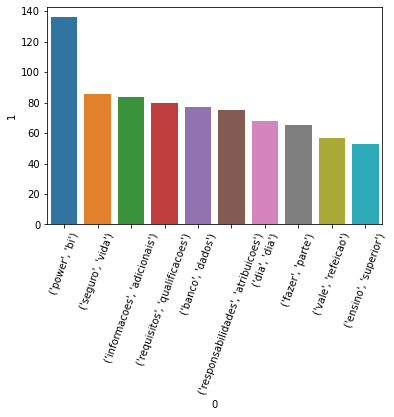

In [53]:
# barplot das 10 duplas mais presentes. 
sns.barplot(data = bigrama_df.head(10),
           x = 0,
           y = 1)
plt.xticks(rotation = 70)

## Funções para automatizar toda análise acima. 

In [54]:
# Para agilizar as próxima análises.
class NGrama:
    
    def __init__(self, df, experiencia, cargo):
        df_filtrado = df[(df['experiencia']==experiencia) & (df['subdivisao']==cargo)]
        self.vagas = len(df_filtrado)
        self.texto =' '.join(df_filtrado['descricoes_tratada'])
        self.tokens = word_tokenize(self.texto)
        unigram = nltk.FreqDist(self.tokens)
        ordenado = sorted(unigram.items(), key=lambda x: x[1], reverse=True)
        unigram_df = pd.DataFrame.from_dict(ordenado)
        self.unigrama = unigram_df.rename({0: 'Tokens', 1:'Frequencia'}, axis = 1)
        self.ferramentas = self.unigrama[self.unigrama['Tokens'].isin(ferramentas)]
        bigrama = nltk.FreqDist(nltk.bigrams(word_tokenize(self.texto)))
        sorted_bgm = sorted(bigrama.items(), key = lambda x: x[1], reverse=True)
        bigrama = pd.DataFrame.from_dict(sorted_bgm)    
        self.bigrama = bigrama.rename({0: 'Tokens', 1:'Frequencia'}, axis = 1)

In [55]:
def show_info(objeto_ngram):

    print('vagas ', objeto_ngram.vagas)

    print('---------')
    print('Unigrama')
    display(objeto_ngram.unigrama.head(20))
    
    a = sns.barplot(data = objeto_ngram.unigrama.head(20),
               x = 'Tokens',
               y = 'Frequencia')
    plt.xticks(rotation = 70)
    plt.show(a)
    plt.clf()
    
    print('---------')
    print('WordCloud')
    wc = WordCloud(collocations = False).generate(objeto_ngram.texto)
    b = plt.imshow(wc)
    plt.axis('off')
    plt.show(b)


    print('---------')
    print('Ferramentas')
    display(objeto_ngram.ferramentas)

    print('---------')
    print('Bigrama')
    display(objeto_ngram.bigrama.head(20))



# Analistas

vagas  29
---------
Unigrama


,Tokens,Frequencia
0,dados,82
1,dia,54
2,solucoes,46
3,voce,44
4,queremos,42
5,clientes,39
6,inovacao,35
7,nao,34
8,forma,34
9,areas,33


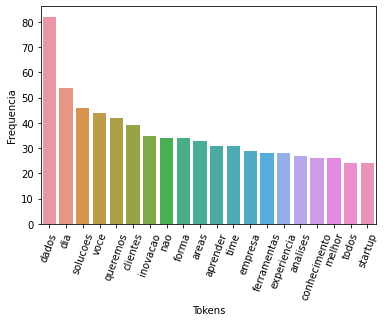

---------
WordCloud


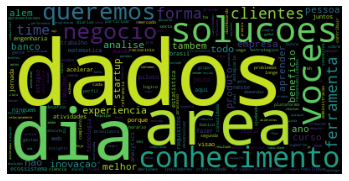

---------
Ferramentas


,Tokens,Frequencia
44,analytics,19
50,diversidade,17
81,excel,13
87,bi,12
124,sql,10
225,python,9
313,datastudio,6
409,r,5
413,power,5
417,vba,5


---------
Bigrama


,Tokens,Frequencia
0,"(dia, dia)",27
1,"(segunda, sexta)",16
2,"(raciocinio, logico)",15
3,"(startup, brasileira)",14
4,"(analises, dados)",13
5,"(ciencia, computacao)",10
6,"(dados, sql)",10
7,"(resolver, problemas)",10
8,"(plataforma, dados)",10
9,"(forma, clara)",10


In [56]:
estag_analist = NGrama(df, 'estagiario', 'analista')
show_info(estag_analist)

vagas  56
---------
Unigrama


,Tokens,Frequencia
0,dados,181
1,voce,156
2,pessoas,110
3,and,92
4,empresa,84
5,fazer,84
6,melhor,83
7,saude,77
8,conhecimento,75
9,beneficios,69


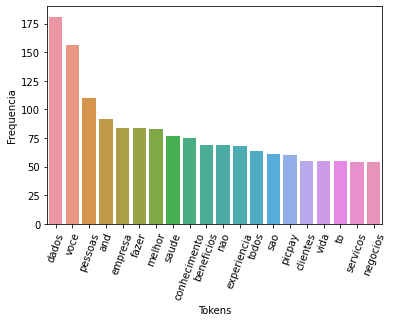

---------
WordCloud


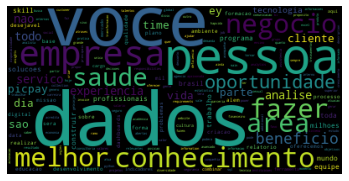

---------
Ferramentas


,Tokens,Frequencia
70,diversidade,28
74,excel,27
82,bi,25
84,sql,24
105,analytics,22
106,python,22
142,power,19
403,r,8
409,learning,8
427,tableau,8


---------
Bigrama


,Tokens,Frequencia
0,"(fazer, parte)",33
1,"(dados, empresa)",27
2,"(mundo, negocios)",24
3,"(negocios, melhor)",24
4,"(formacao, academica)",23
5,"(combinar, cargo)",23
6,"(desejavel, conhecimento)",22
7,"(todos, dias)",22
8,"(analista, dados)",21
9,"(power, bi)",19


In [57]:
assist_analist = NGrama(df, 'assistente', 'analista')
show_info(assist_analist)

vagas  198
---------
Unigrama


,Tokens,Frequencia
0,dados,720
1,voce,375
2,experiencia,323
3,pessoas,302
4,conhecimento,229
5,clientes,224
6,time,223
7,desenvolvimento,209
8,nao,197
9,area,197


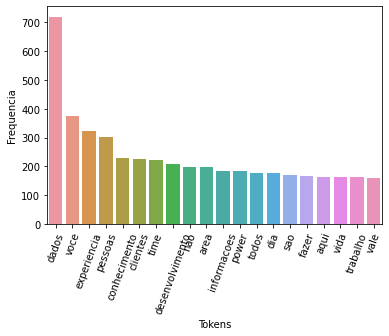

---------
WordCloud


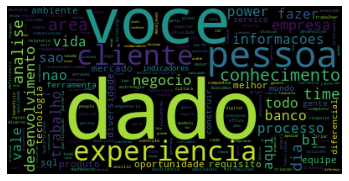

---------
Ferramentas


,Tokens,Frequencia
11,power,184
20,bi,157
23,sql,149
31,diversidade,129
42,excel,110
103,analytics,71
121,python,60
182,r,49
206,vba,44
208,tableau,44


---------
Bigrama


,Tokens,Frequencia
0,"(power, bi)",136
1,"(seguro, vida)",86
2,"(informacoes, adicionais)",84
3,"(requisitos, qualificacoes)",80
4,"(banco, dados)",77
5,"(responsabilidades, atribuicoes)",75
6,"(dia, dia)",68
7,"(fazer, parte)",65
8,"(vale, refeicao)",57
9,"(ensino, superior)",53


In [58]:
jr_analist = NGrama(df, 'junior', 'analista')
show_info(jr_analist)

vagas  91
---------
Unigrama


,Tokens,Frequencia
0,dados,324
1,pessoas,257
2,voce,190
3,empresa,183
4,nao,159
5,trabalho,141
6,conhecimento,138
7,todos,112
8,deficiencia,105
9,time,99


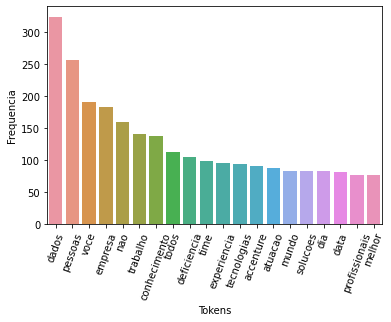

---------
WordCloud


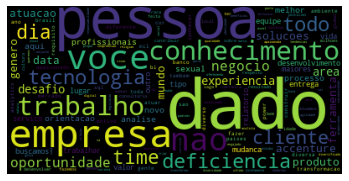

---------
Ferramentas


,Tokens,Frequencia
43,bi,61
49,analytics,58
52,power,56
66,sql,46
97,excel,37
107,diversidade,35
216,python,24
217,r,24
248,tableau,19
369,sas,12


---------
Bigrama


,Tokens,Frequencia
0,"(orientacao, sexual)",73
1,"(maiores, empresas)",63
2,"(power, bi)",45
3,"(atuacao, diversas)",36
4,"(voce, tambem)",36
5,"(time, dados)",35
6,"(ferramentas, ponta)",35
7,"(trabalhar, empresa)",35
8,"(ambiente, trabalho)",34
9,"(transformacao, digital)",34


In [59]:
pleno_analist = NGrama(df, 'pleno', 'analista')
show_info(pleno_analist)

vagas  4
---------
Unigrama


,Tokens,Frequencia
0,experiencia,20
1,sera,16
2,dados,14
3,analista,12
4,voce,12
5,mercado,12
6,compras,10
7,auxilio,10
8,empresa,8
9,desenvolvimento,8


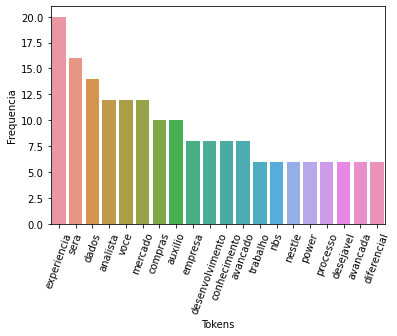

---------
WordCloud


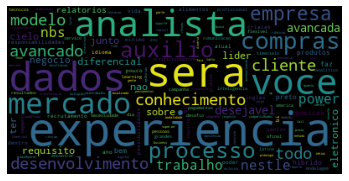

---------
Ferramentas


,Tokens,Frequencia
15,power,6
37,bi,4
69,learning,4
142,excel,2
143,vba,2
353,sql,2
358,python,2
359,r,2
360,sas,2


---------
Bigrama


,Tokens,Frequencia
0,"(experiencia, avancada)",6
1,"(sera, diferencial)",6
2,"(relatorios, mercado)",6
3,"(power, bi)",4
4,"(processo, compras)",4
5,"(desejavel, experiencia)",4
6,"(ingles, avancado)",4
7,"(lider, segmento)",4
8,"(segmento, pagamentos)",4
9,"(pagamentos, eletronicos)",4


In [60]:
senior_analist = NGrama(df, 'senior', 'analista')
show_info(senior_analist)

# Cientistas

vagas  54
---------
Unigrama


,Tokens,Frequencia
0,dados,191
1,pessoas,165
2,picpay,165
3,mercado,109
4,produtos,104
5,dia,90
6,conhecimento,90
7,voce,87
8,fazer,87
9,vida,76


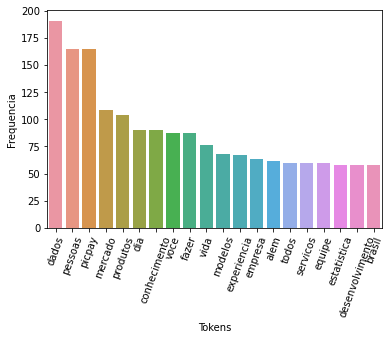

---------
WordCloud


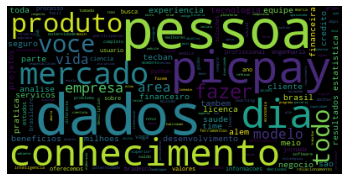

---------
Ferramentas


,Tokens,Frequencia
38,python,41
60,r,36
80,learning,32
113,machine,27
128,diversidade,24
149,sql,22
576,analytics,7
683,sas,6
685,vba,6
688,excel,6


---------
Bigrama


,Tokens,Frequencia
0,"(dia, dia)",45
1,"(fazer, parte)",42
2,"(inteligencia, mercado)",32
3,"(picpay, lovers)",32
4,"(job, description)",31
5,"(main, responsibilities)",31
6,"(requirements, and)",31
7,"(and, skills)",31
8,"(website, linkedin)",31
9,"(produtos, servicos)",28


In [61]:
assist_cient = NGrama(df, 'assistente', 'cientista')
show_info(assist_cient)

vagas  40
---------
Unigrama


,Tokens,Frequencia
0,dados,128
1,conhecimento,106
2,pessoas,87
3,voce,78
4,melhor,69
5,basico,65
6,fazer,63
7,modelos,59
8,ey,48
9,globo,48


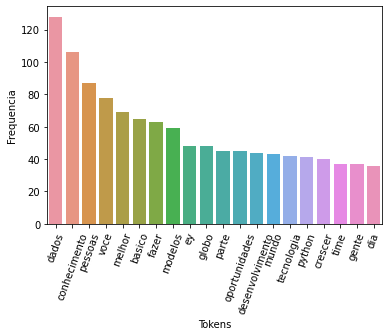

---------
WordCloud


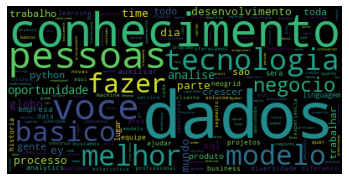

---------
Ferramentas


,Tokens,Frequencia
15,python,41
21,sql,33
32,analytics,30
42,learning,26
43,diversidade,26
54,machine,22
151,r,13
284,power,6
285,bi,6
435,google,6


---------
Bigrama


,Tokens,Frequencia
0,"(conhecimento, basico)",65
1,"(fazer, parte)",39
2,"(basico, linguagem)",26
3,"(parte, time)",25
4,"(analise, dados)",23
5,"(machine, learning)",22
6,"(voce, sera)",19
7,"(bancos, dados)",19
8,"(sql, conhecimento)",19
9,"(qualquer, lugar)",19


In [62]:
jr_cient = NGrama(df, 'junior', 'cientista')
show_info(jr_cient)

vagas  46
---------
Unigrama


,Tokens,Frequencia
0,dados,202
1,voce,119
2,experiencia,106
3,negocio,99
4,conhecimento,84
5,pessoas,79
6,modelos,77
7,data,72
8,time,65
9,desenvolvimento,64


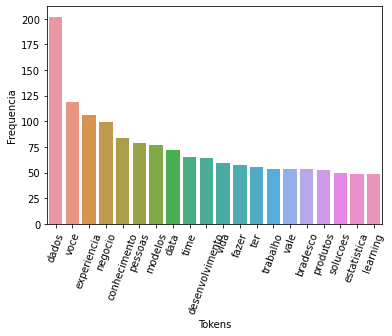

---------
WordCloud


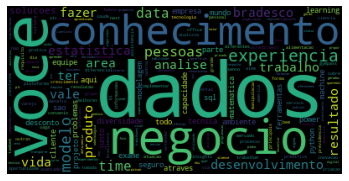

---------
Ferramentas


,Tokens,Frequencia
19,learning,49
20,sql,48
23,diversidade,47
26,machine,44
28,python,43
30,power,41
59,bi,26
78,r,23
198,analytics,14
227,excel,12


---------
Bigrama


,Tokens,Frequencia
0,"(machine, learning)",44
1,"(fazer, parte)",29
2,"(seguro, vida)",27
3,"(power, bi)",26
4,"(resolucao, problemas)",25
5,"(vale, alimentacao)",22
6,"(areas, negocio)",20
7,"(data, science)",19
8,"(matematica, estatistica)",18
9,"(python, r)",18


In [63]:
pleno_cient = NGrama(df, 'pleno', 'cientista')
show_info(pleno_cient)

vagas  3
---------
Unigrama


,Tokens,Frequencia
0,descricao,6
1,cliente,6
2,digital,6
3,empresas,6
4,argentina,6
5,microsoft,6
6,startup,6
7,the,6
8,top,6
9,outlook,6


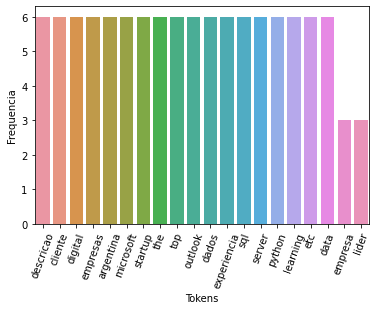

---------
WordCloud


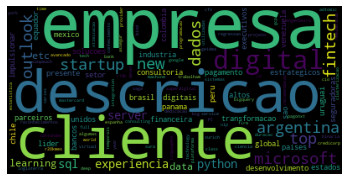

---------
Ferramentas


,Tokens,Frequencia
12,sql,6
14,python,6
15,learning,6
57,google,3
96,machine,3
112,r,3


---------
Bigrama


,Tokens,Frequencia
0,"(descricao, empresa)",3
1,"(empresa, cliente)",3
2,"(cliente, lider)",3
3,"(lider, global)",3
4,"(global, setor)",3
5,"(setor, consultoria)",3
6,"(consultoria, desenvolvimento)",3
7,"(desenvolvimento, solucoes)",3
8,"(solucoes, impulsionar)",3
9,"(impulsionar, transformacao)",3


In [64]:
senior_cient = NGrama(df, 'senior', 'cientista')
show_info(senior_cient)

vagas  11
---------
Unigrama


,Tokens,Frequencia
0,dados,111
1,voce,42
2,conhecimento,31
3,data,31
4,experiencia,24
5,queima,24
6,desenvolvimento,18
7,atraves,18
8,saude,18
9,requisitos,16


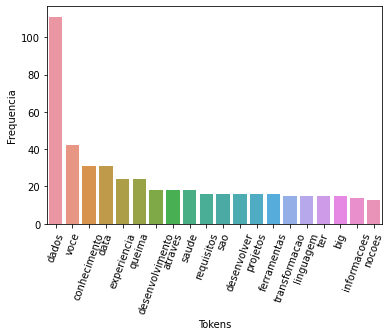

---------
WordCloud


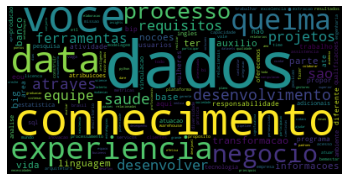

---------
Ferramentas


,Tokens,Frequencia
43,sql,10
72,diversidade,8
85,bi,7
105,python,6
174,excel,4
175,power,4
246,r,3
248,pandas,3
272,spark,3
437,tableau,3


---------
Bigrama


,Tokens,Frequencia
0,"(big, data)",15
1,"(bases, dados)",12
2,"(ate, 2023)",12
3,"(responsabilidades, atribuicoes)",10
4,"(requisitos, qualificacoes)",10
5,"(informacoes, adicionais)",10
6,"(dados, conhecimento)",9
7,"(aqui, queima)",9
8,"(bancos, dados)",9
9,"(data, warehouse)",7


In [65]:
jr_eng = NGrama(df, 'junior', 'engenheiro')
show_info(jr_eng)

vagas  30
---------
Unigrama


,Tokens,Frequencia
0,energia,138
1,shell,102
2,dados,90
3,inovacao,84
4,dia,78
5,time,72
6,ate,66
7,empresa,64
8,parte,63
9,pessoas,57


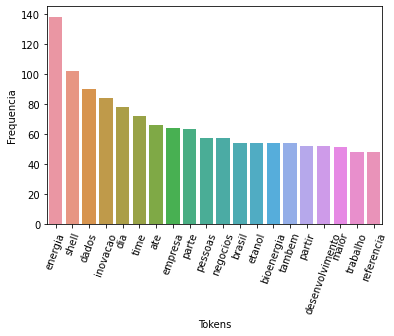

---------
WordCloud


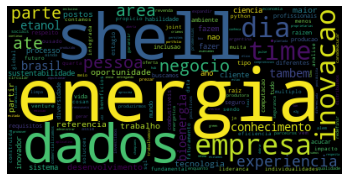

---------
Ferramentas


,Tokens,Frequencia
48,diversidade,30
70,sql,25
71,python,24
171,excel,21
176,google,21
220,power,12
235,machine,10
236,learning,10
351,bi,6
589,sheets,3


---------
Bigrama


,Tokens,Frequencia
0,"(ate, 2030)",48
1,"(dia, dia)",36
2,"(respeito, diversidade)",30
3,"(diversidade, inclusao)",30
4,"(raiz, tudo)",30
5,"(ciencia, dados)",27
6,"(propicio, desenvolvimento)",27
7,"(diferentes, tipos)",24
8,"(tipos, energia)",24
9,"(energia, construida)",24


In [66]:
assist_cient = NGrama(df, 'estagiario', 'cientista')
show_info(assist_cient)